In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin

# Basic definition

In [2]:
Hn=4
am=np.array([[0, 1, 0,0,0],[0, 0, np.sqrt(2.0), 0,0],[0,0,0,np.sqrt(3.0),0],[0,0,0,0,np.sqrt(4.0)],[0,0,0,0,0]])
am=am[:Hn,:Hn]
am

array([[0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.41421356, 0.        ],
       [0.        , 0.        , 0.        , 1.73205081],
       [0.        , 0.        , 0.        , 0.        ]])

In [3]:
ap=np.array(am.T)
ap=ap[:Hn,:Hn]
ap

array([[0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.41421356, 0.        , 0.        ],
       [0.        , 0.        , 1.73205081, 0.        ]])

In [4]:
II=np.array([[1, 0, 0,0,0],[0, 1, 0, 0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,0]])
II=II[:Hn,:Hn]
n=np.dot(ap, am)
n

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 3.]])

In [5]:
def Boson(A, n, tot):
    Total=[]
    for m in range(len(A)):
        S=1.0
        for i in range(tot):
            if i==n:
                S=np.kron(S, A[m])
            else:
                S=np.kron(S, II)
        #print S.shape
        Total.append(S)
    #print Total
    return Total

In [6]:
def Coup(A, B):
    #print A[0].shape
    N=A[0].shape[0]
    #print N
    H=np.zeros([N, N])+0j
    for i in range(len(A)):
        H+=np.dot(A[i], B[i])
    return H

In [7]:
def Interaction(tot):
    N=n.shape[0]**tot
    Interaction=np.zeros([N, N])
    for i in range(tot):
        Interaction+=np.dot(Boson([n], i, tot)[0], Boson([n], i, tot)[0])
    return Interaction

In [8]:
def Density(tot):
    N=n.shape[0]**tot
    Density=np.zeros([N, N])
    for i in range(tot):
        Density+=Boson([n], i, tot)[0]
    return Density

In [22]:
def FreeEnergy(T, E):
    ZZ=0.0
    #E, _=lin.eigh(H)
    for e in E:
        ZZ+=np.exp(-e/T)
    return np.log(ZZ)*T

In [34]:
def SpecificHeat(T, E):
    ZZ=0.0
    #E, _=lin.eigh(H)
    for e in E:
        ZZ+=np.exp(-e/T)
    AveE=0.0
    AveE2=0.0
    for e in E:
        AveE+=e*np.exp(-e/T)/ZZ
        AveE2+=e*e*np.exp(-e/T)/ZZ
    return (AveE2-AveE**2)/T/T

# One Boson

In [9]:
def H1(U, mu):
    return U/2.0*Interaction(1)-mu*Density(1)

In [10]:
lin.eigh(H1(1.0, 1.0))

(array([-5.0000000e-01,  0.0000000e+00,  4.4408921e-16,  1.5000000e+00]),
 array([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]))

# Two Bosons

In [11]:
def H2(t, U, mu):
    Hopping=-t*Coup(Boson([am, ap], 0, 2), Boson([ap, am], 1, 2))
    #print Boson([n], 0, 2)[0].shape
    return Hopping+U/2.0*Interaction(2)-mu*Density(2)

In [61]:
E, _=lin.eigh(H2(0.1, 1.0, 1.0))
print E

[-1.03851648e+00 -7.13552873e-01 -6.00000000e-01 -4.00000000e-01
 -3.16515139e-01 -1.08276253e-01  0.00000000e+00  4.75627727e-16
  3.85164807e-02  1.00000000e+00  1.10827625e+00  1.20000000e+00
  1.51355287e+00  1.51651514e+00  1.80000000e+00  3.00000000e+00]


In [13]:
Hkin=-(np.dot(np.kron(am, II), np.kron(II, ap))+np.dot(np.kron(ap, II), np.kron(II, am)))
E, wave=lin.eigh(Hkin)
print E/2
print wave.T[0]
print np.dot(wave.T[0], np.dot(Hkin, wave.T[0]))   #average energy
print np.dot(wave.T[0], np.dot(Density(2), wave.T[0])) #average particle number

[-1.73205081e+00 -1.50000000e+00 -1.50000000e+00 -1.00000000e+00
 -5.00000000e-01 -5.00000000e-01 -9.19403442e-17 -0.00000000e+00
 -0.00000000e+00  2.60208521e-17  5.00000000e-01  5.00000000e-01
  1.00000000e+00  1.50000000e+00  1.50000000e+00  1.73205081e+00]
[ 0.          0.          0.          0.          0.          0.
  0.         -0.5         0.          0.         -0.70710678  0.
  0.         -0.5         0.          0.        ]
-3.4641016151377535
3.9999999999999982


In [14]:
Curves={}
x=np.array(range(200))*0.005
for i in range(200):
    t=i*0.005
    E, _=lin.eigh(H2(t, 1.0, 1.0))
    #print len(E)
    for e in range(len(E)):
        if Curves.has_key(e):
            Curves[e].append(E[e]/2.0)
        else:
            Curves[e]=[E[e]/2.0]

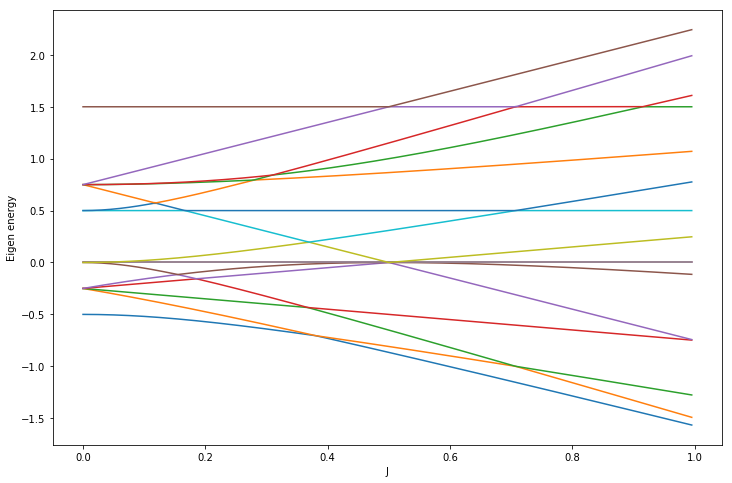

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
for e in range(len(Curves)):
    ax.plot(x, Curves[e], label=e)
#ax.set_ylim([-1, 0])
ax.set_xlabel("J")
ax.set_ylabel("Eigen energy")
#plt.legend()
plt.show()

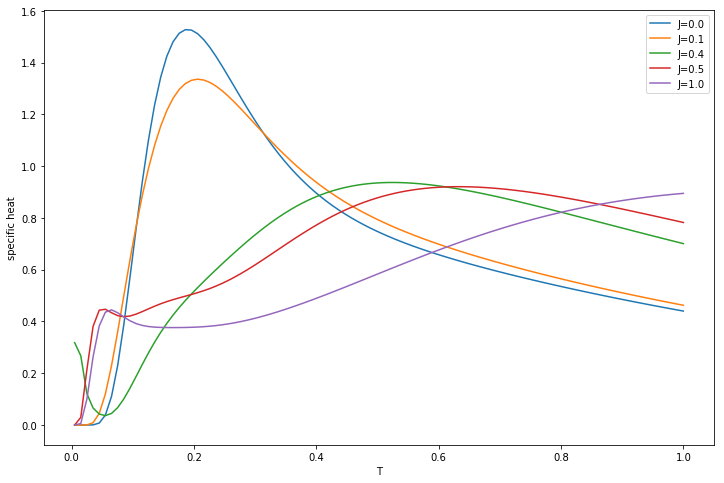

In [78]:
T=np.linspace(0.005, 1, 100)
J=[0.0, 0.1,  0.4, 0.5,1.0]
Cv=[]
for j in J:
    E, _=lin.eigh(H2(j, 1.0, 1.0))
    Cv.append(np.array([SpecificHeat(t, E) for t in T]))


fig, ax = plt.subplots(figsize=(12,8))
for i in range(len(Cv)):
    ax.plot(T, Cv[i], label="J={0}".format(J[i]))
#ax.set_ylim([-1, 0])
#ax.set_xlim([0, 0.1])
ax.set_xlabel("T")
ax.set_ylabel("specific heat")
plt.legend()
plt.show()

# Four Bosons

In [64]:
def H4(t, U, mu):
    Hop01=Coup(Boson([am, ap], 0, 4), Boson([ap, am], 1, 4))
    Hop02=Coup(Boson([am, ap], 0, 4), Boson([ap, am], 2, 4))
    Hop13=Coup(Boson([am, ap], 1, 4), Boson([ap, am], 3, 4))
    Hop23=Coup(Boson([am, ap], 2, 4), Boson([ap, am], 3, 4))
    #print Boson([n], 0, 2)[0].shape
    return -t*(Hop01+Hop02+Hop13+Hop23)+U/2.0*Interaction(4)-mu*Density(4)

In [69]:
Curves={}
x=np.array(range(100))*0.005
for i in range(100):
    t=i*0.005
    E, _=lin.eigh(H4(t, 1.0, 1.0))
    #print len(E)
    for e in range(len(E)):
        if Curves.has_key(e):
            Curves[e].append(E[e])
        else:
            Curves[e]=[E[e]]

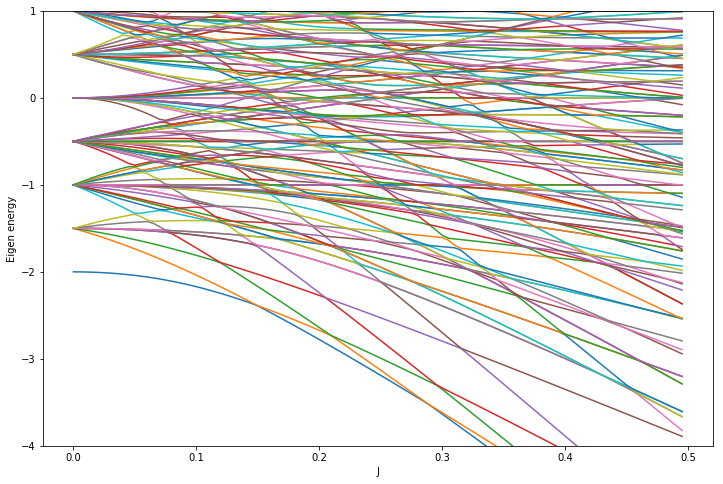

In [73]:
fig, ax = plt.subplots(figsize=(12,8))
for e in range(len(Curves)):
    ax.plot(x, Curves[e], label=e)
ax.set_ylim([-4, 1])
ax.set_xlabel("J")
ax.set_ylabel("Eigen energy")
#plt.legend()
plt.show()

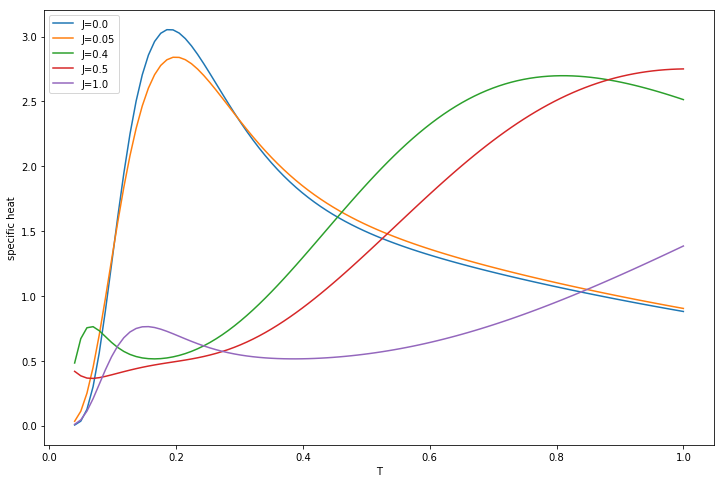

In [79]:
T=np.linspace(0.04, 1, 100)
J=[0.0, 0.05,  0.4, 0.5,1.0]
Cv=[]
for j in J:
    E, _=lin.eigh(H4(j, 1.0, 1.0))
    Cv.append(np.array([SpecificHeat(t, E) for t in T]))


fig, ax = plt.subplots(figsize=(12,8))
for i in range(len(Cv)):
    ax.plot(T, Cv[i], label="J={0}".format(J[i]))
#ax.set_ylim([-1, 0])
#ax.set_xlim([0, 0.1])
ax.set_xlabel("T")
ax.set_ylabel("specific heat")
plt.legend()
plt.show()